## Part 1
### Batch Normalization

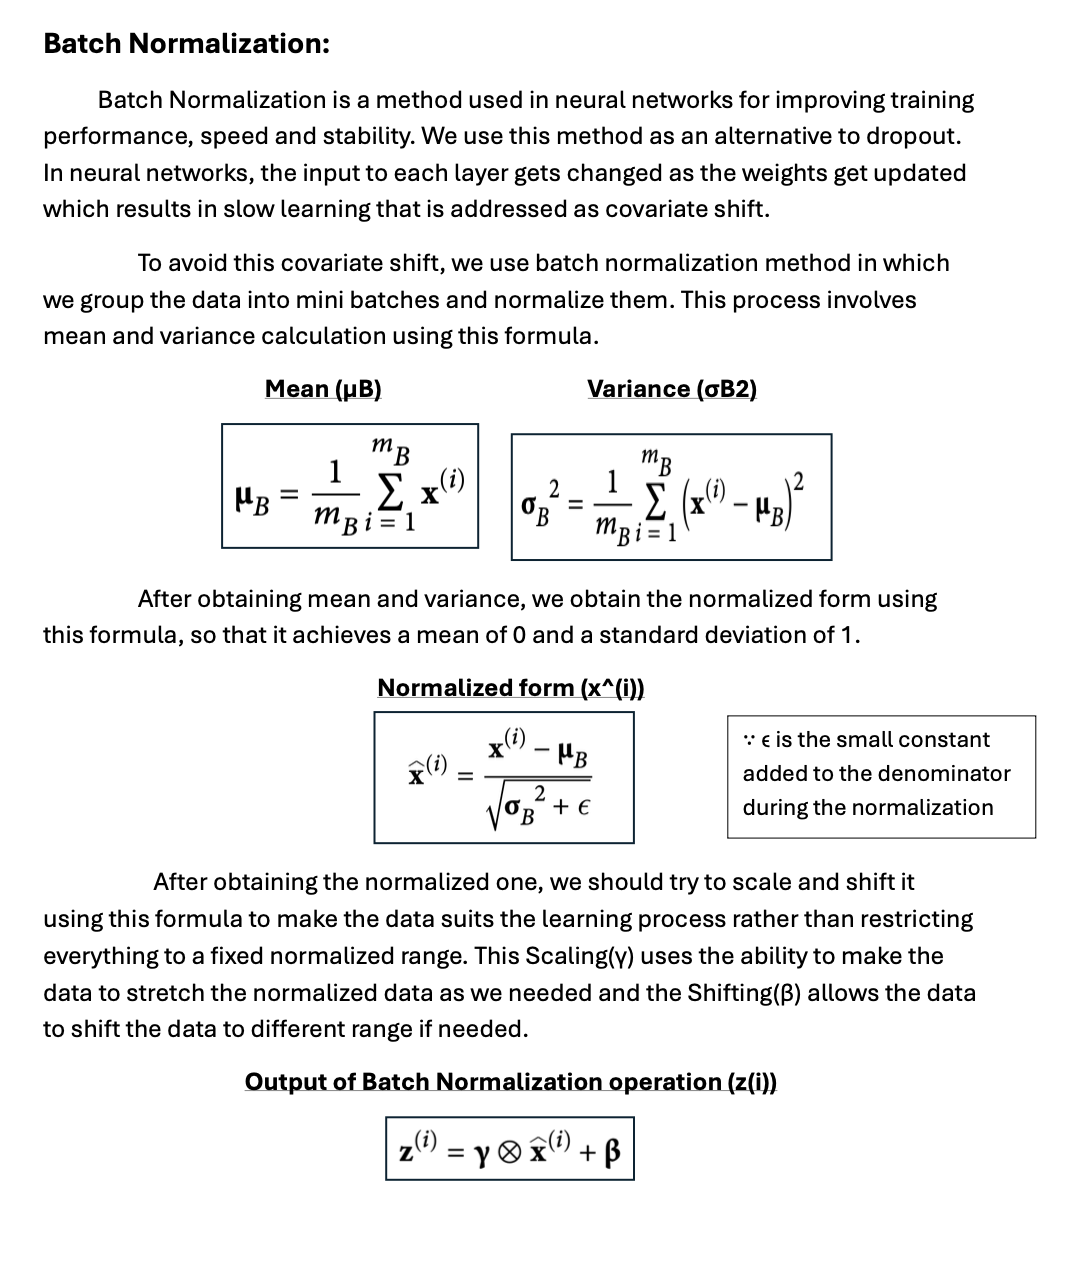

## Part 2
### Classifying handwritten digits using artificial neural networks

In [4]:
# pip install tensorflow

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers

In [6]:
# https://keras.io/api/datasets/

(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [10]:
X_train.shape

(50000, 28, 28)

In [11]:
X_valid.shape

(10000, 28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


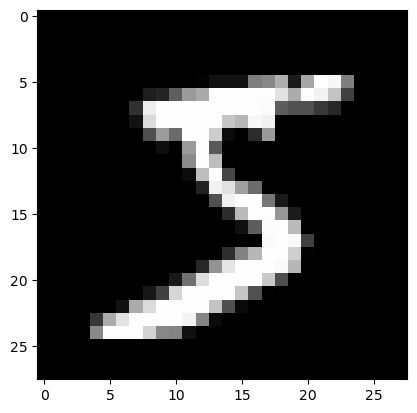

In [13]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

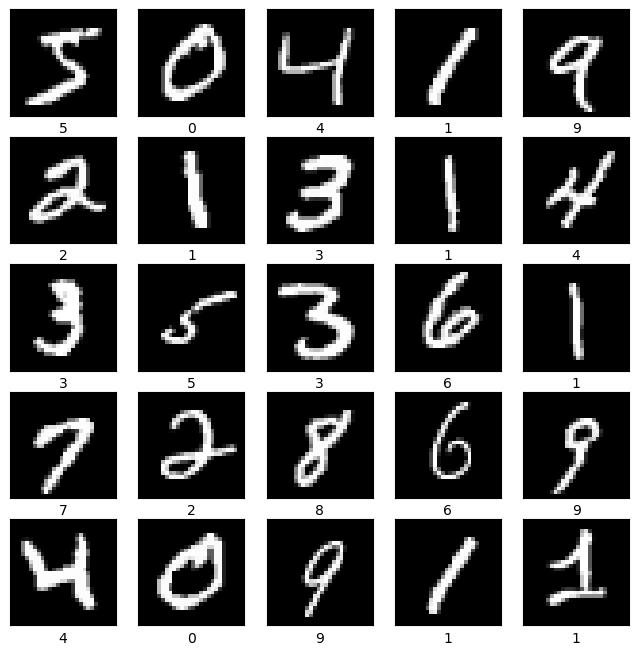

In [14]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [15]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [16]:
#stantardizing the data
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.7987 - loss: 0.7741
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.9112 - loss: 0.3208
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.9189 - loss: 0.2926
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9224 - loss: 0.2739
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.9253 - loss: 0.2677


In [21]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.9271 - loss: 0.2638 - val_accuracy: 0.9312 - val_loss: 0.2561
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.9255 - loss: 0.2642 - val_accuracy: 0.9308 - val_loss: 0.2563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9271 - loss: 0.2563 - val_accuracy: 0.9309 - val_loss: 0.2574
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.9290 - loss: 0.2543 - val_accuracy: 0.9299 - val_loss: 0.2557
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9308 - loss: 0.2494 - val_accuracy: 0.9309 - val_loss: 0.2537
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9306 - loss: 0.2513 - val_accuracy: 0.9317 - val_loss: 0.2523
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.9306 - loss: 0.2484 - val_accuracy: 0.9308 - val_loss: 0.2550
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.9310 -

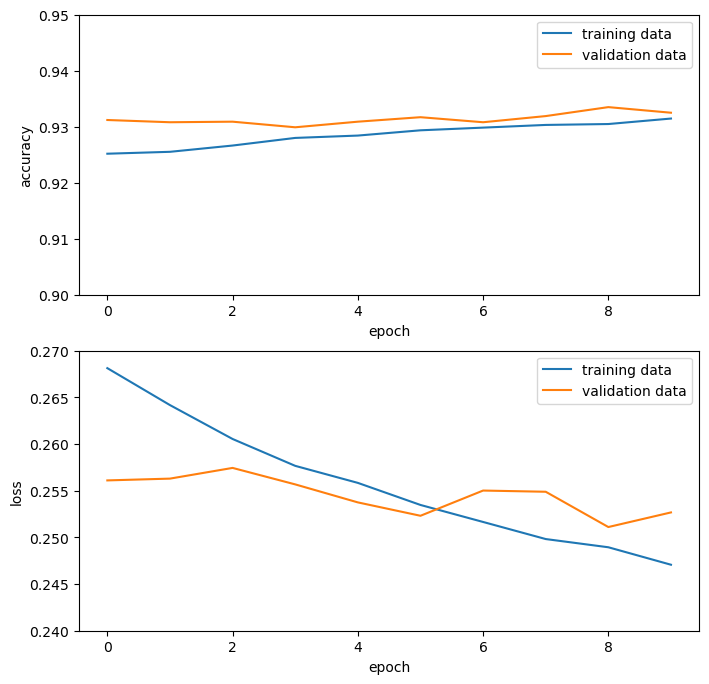

In [22]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.9,0.95])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.24,0.27])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [23]:
ann1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step - accuracy: 0.9168 - loss: 0.2992


[0.26473087072372437, 0.9276000261306763]

In [24]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


array([1.8280326e-07, 5.8962741e-13, 1.0938279e-06, 6.3747447e-03,
       3.5096872e-07, 2.5853426e-05, 1.4449616e-12, 9.9306142e-01,
       1.0444852e-05, 5.2595756e-04], dtype=float32)

In [25]:
np.argmax(y_pred[0])

7

7


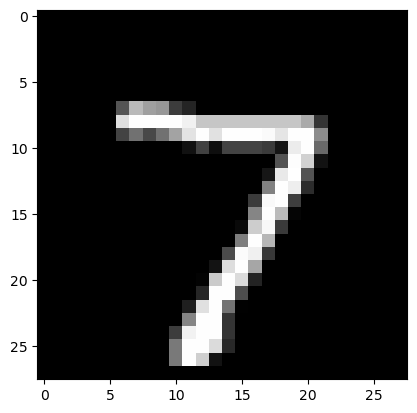

In [26]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [27]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [28]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[ 957,    0,    0,    3,    0,    6,   10,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,   10,  925,   14,    8,    5,   13,   10,   40,    4],
       [   3,    0,   17,  918,    1,   27,    2,   11,   19,   12],
       [   1,    2,    5,    2,  919,    0,    7,    5,    6,   35],
       [   7,    2,    3,   30,    8,  792,   15,    6,   24,    5],
       [   9,    3,    9,    1,    7,   15,  911,    1,    2,    0],
       [   1,    7,   21,    7,    7,    1,    0,  948,    2,   34],
       [   7,   11,    6,   18,    9,   32,    9,   10,  858,   14],
       [  11,    6,    1,    7,   25,    7,    0,   16,    5,  931]])

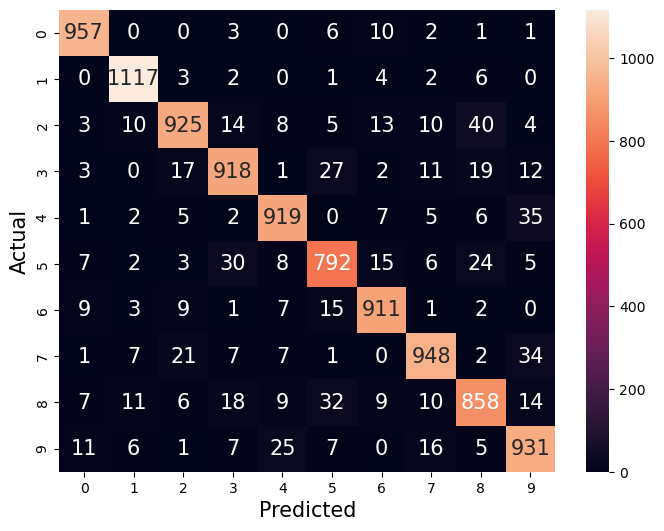

In [29]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.92      0.91      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.89      0.89      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.88      0.89       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [31]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8659 - loss: 0.4726
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9601 - loss: 0.1379
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9736 - loss: 0.0895
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9799 - loss: 0.0655
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9849 - loss: 0.0507


In [32]:
ann2.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9719 - loss: 0.0867


[0.08284404873847961, 0.9754999876022339]

In [33]:
ann2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [34]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.8581 - loss: 0.4539
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9472 - loss: 0.1726
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.9617 - loss: 0.1283
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9674 - loss: 0.1093
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9689 - loss: 0.1005


In [35]:
ann3.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9717 - loss: 0.0899


[0.08313284069299698, 0.9753000140190125]

In [36]:
ann3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,336 (1.17 MB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 204,054 (797.09 KB)

## Homework - 4

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers, regularizers

from sklearn.metrics import confusion_matrix 
import seaborn as sn
from sklearn.metrics import classification_report

In [39]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [40]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [41]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

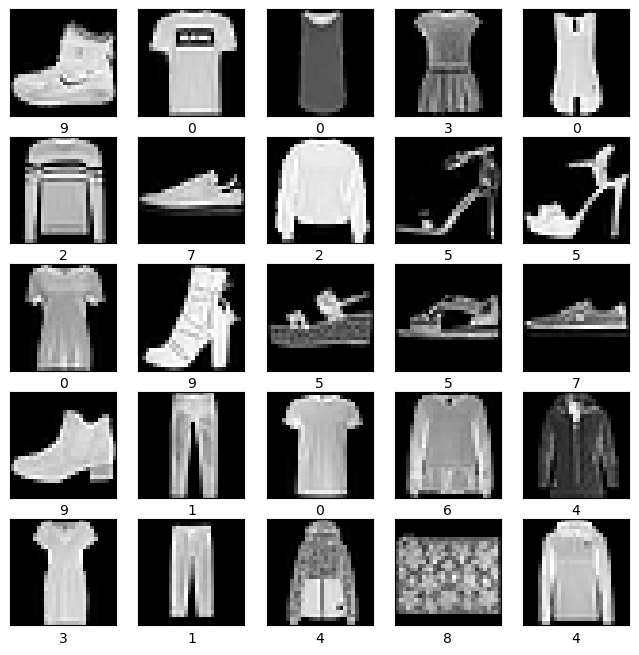

In [42]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [43]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [44]:
input_shape = X_train_full.shape[1:]
output_shape = max(y_train_full) + 1

In [45]:
def print_experiment(
    num_layers, 
    num_hidden_neurons, 
    optimizer, 
    batch_size, 
    learning_rate, 
    regularization, 
    dropout, 
    batch_normalization, 
    weight_init, 
    bias_init
):
    # declared optimizers
    optimizer_map = {
        'sgd': optimizers.SGD,
        'adam': optimizers.Adam,
        'adadelta': optimizers.Adadelta
    }
    # declared regularization methods
    regularization_map = {
        'l1': regularizers.l1,
        'l2': regularizers.l2
    }
    # initialized weights and biases
    weight_init_options = ['glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform', 'random_normal', 'random_uniform']
    bias_init_options = ['zeros', 'ones', 'random_normal']

    # num layers and num hidden neurons check
    if not isinstance(num_layers, int) and not num_layers > 0: raise ValueError('Invalid Number of Layers')
    if isinstance(num_hidden_neurons, int): num_hidden_neurons = [num_hidden_neurons]*(num_layers - 1)
    elif isinstance(num_hidden_neurons, list) and len(num_hidden_neurons) == num_layers - 1: pass
    else: raise ValueError('Invalid Number of Neurons')
    
    # optimizer, batch size, learning rate check
    if optimizer not in optimizer_map.keys(): raise NotImplementedError('Optimizer not Supported')
    if learning_rate is None: opt = optimizer
    elif isinstance(learning_rate, float): opt = optimizer_map[optimizer](learning_rate)
    else: raise ValueError('Invalid Learning Rate')
    if batch_size is not None and not isinstance(batch_size, int): raise ValueError('Invalid Batch Size')

    # regularization, dropout, batch normalization 
    if regularization is None: regularizer = None
    elif regularization[0] in regularization_map.keys() and isinstance(regularization[1], float): regularizer = regularization_map[regularization[0]](regularization[1])
    else: raise ValueError('Invalid Regularizer')
    if dropout is not None and (not isinstance(dropout, float) or not (0 <= dropout < 1)): raise ValueError('Invalid Dropout')
    if not isinstance(batch_normalization, bool): raise ValueError('Invalid Batch Normalization')

    # weight_init and bias_init
    if weight_init is not None and weight_init not in weight_init_options: raise NotImplementedError('Weight Init not Supported')
    if bias_init is not None and bias_init not in bias_init_options: raise NotImplementedError('Invalid Bias Init not Supported')

    # experiment details
    print(f'Experiment {i+1} with {num_layers} layers: {num_hidden_neurons+[output_shape]}')
    print(f"Using {optimizer.upper()} optimizer with "
        f"{'default learning rate' if learning_rate is None else f'{learning_rate} learning rate'} and "
        f"{'default batch_size' if batch_size is None else f'{batch_size} batch_size'}")
    print(f"{'No regularization' if regularization is None else f'{regularization[0]} regularization with {regularization[1]}'}, "
        f"{'no dropout' if dropout is None else f'{dropout} dropout'}, and "
        f"{'with batch normalization' if batch_normalization else 'no batch normalization'}")
    print(f'{weight_init} weight initialization and {bias_init} bias initialization')

    return num_hidden_neurons, opt, batch_size, regularizer, dropout, batch_normalization, weight_init, bias_init

def create_model(
    num_hidden_neurons, 
    optimizer, 
    regularization, 
    dropout, 
    batch_normalization, 
    weight_init, 
    bias_init
):
    # flatten layer (input)
    ann = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten()
    ])

    # hidden layers
    for neuron in num_hidden_neurons:
        ann.add(layers.Dense(
            neuron, activation='relu',
            kernel_regularizer=regularization,
            kernel_initializer=weight_init,
            bias_initializer=bias_init
        ))
        if batch_normalization: ann.add(layers.BatchNormalization())
        if dropout: ann.add(layers.Dropout(dropout))

    # last layer (output)
    ann.add(layers.Dense(
        output_shape, activation='softmax',
        kernel_regularizer=regularization,
        kernel_initializer=weight_init,
        bias_initializer=bias_init
    ))

    # compile
    ann.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )

    ann.summary()
    return ann

def plot_stats(ann, info):
    # loss, acc curves
    loss, acc = info.history['loss'], info.history['accuracy']
    val_loss, val_acc = info.history['val_loss'], info.history['val_accuracy']

    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(acc, label='training data')
    plt.plot(val_acc, label='validation data')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='training data')
    plt.plot(val_loss, label='validation data')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    # test accuracy
    ann.evaluate(X_test, y_test)
    y_pred = ann.predict(X_test)
    y_pred_labels = [np.argmax(i) for i in y_pred]

    # confusion matrix
    plt.figure(figsize=(8, 6))

    sn.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='d', annot_kws={"size":15})
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)

    # classification report
    plt.show()
    print(classification_report(y_test, y_pred_labels))


Experiment 1 with 1 layers: [10]
Using ADAM optimizer with default learning rate and default batch_size
No regularization, no dropout, and no batch normalization
None weight initialization and None bias initialization


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.7335 - loss: 0.8050 - val_accuracy: 0.8298 - val_loss: 0.5020
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8382 - loss: 0.4765 - val_accuracy: 0.8399 - val_loss: 0.4606
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8520 - loss: 0.4370 - val_accuracy: 0.8455 - val_loss: 0.4555
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.8558 - loss: 0.4236 - val_accuracy: 0.8463 - val_loss: 0.4447
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8568 - loss: 0.4144 - val_accuracy: 0.8495 - val_loss: 0.4336
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.8629 - loss: 0.4032 - val_accuracy: 0.8535 - val_loss: 0.4292
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.8635 - loss: 0.4031 - val_accuracy: 0.8527 - val_loss: 0.4285
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.8597 -

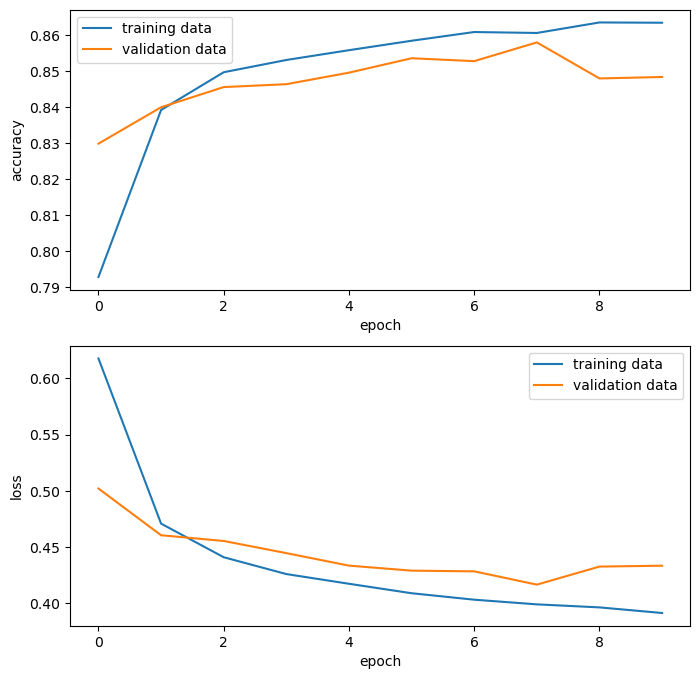

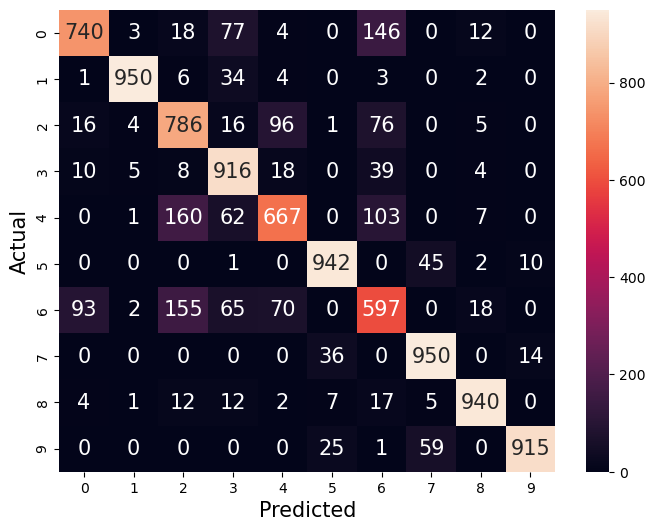

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.69      0.79      0.73      1000
           3       0.77      0.92      0.84      1000
           4       0.77      0.67      0.72      1000
           5       0.93      0.94      0.94      1000
           6       0.61      0.60      0.60      1000
           7       0.90      0.95      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Experiment 2 with 2 layers: [128, 10]
Using ADAM optimizer with default learning rate and default batch_size
No regularization, no dropout, and no batch normalization
None weight initialization and None bias initialization


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.7741 - loss: 0.6575 - val_accuracy: 0.8460 - val_loss: 0.4292
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8536 - loss: 0.4018 - val_accuracy: 0.8671 - val_loss: 0.3685
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.8748 - loss: 0.3465 - val_accuracy: 0.8511 - val_loss: 0.3986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8830 - loss: 0.3179 - val_accuracy: 0.8747 - val_loss: 0.3482
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.8860 - loss: 0.3029 - val_accuracy: 0.8801 - val_loss: 0.3384
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.8961 - loss: 0.2795 - val_accuracy: 0.8736 - val_loss: 0.3551
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.8979 - loss: 0.2717 - val_accuracy: 0.8872 - val_loss: 0.3171
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9042 -

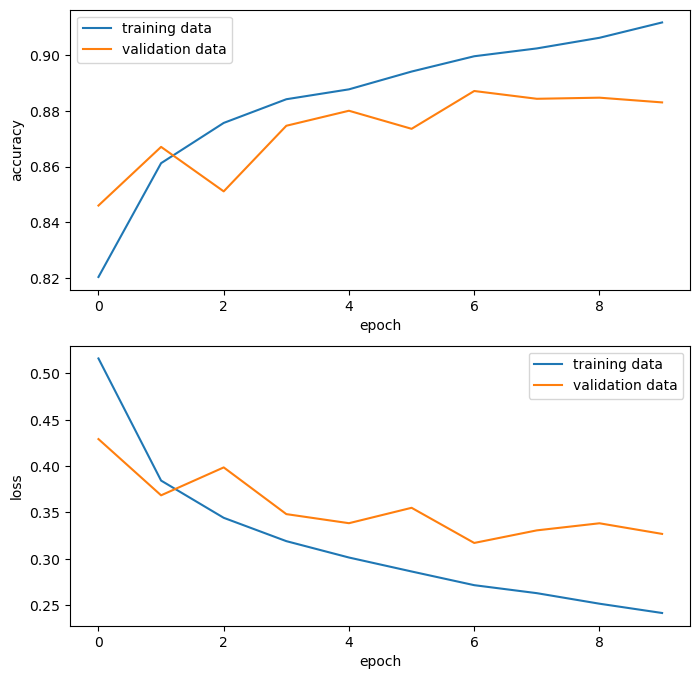

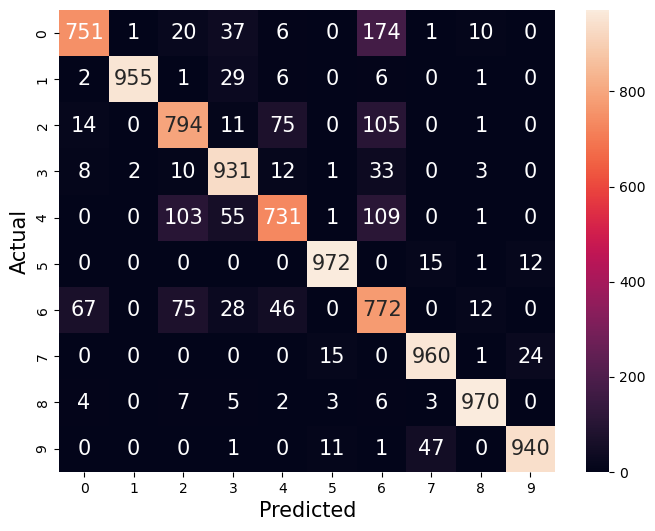

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1000
           1       1.00      0.95      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.85      0.93      0.89      1000
           4       0.83      0.73      0.78      1000
           5       0.97      0.97      0.97      1000
           6       0.64      0.77      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Experiment 3 with 2 layers: [128, 10]
Using ADAM optimizer with default learning rate and default batch_size
No regularization, 0.2 dropout, and with batch normalization
None weight initialization and None bias initialization


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,282 (399.54 KB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.7741 - loss: 0.6638 - val_accuracy: 0.8342 - val_loss: 0.4517
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8412 - loss: 0.4437 - val_accuracy: 0.8446 - val_loss: 0.4388
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.8496 - loss: 0.4219 - val_accuracy: 0.8436 - val_loss: 0.4376
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8567 - loss: 0.4006 - val_accuracy: 0.8647 - val_loss: 0.3740
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8628 - loss: 0.3849 - val_accuracy: 0.8660 - val_loss: 0.3726
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.8691 - loss: 0.3607 - val_accuracy: 0.8690 - val_loss: 0.3633
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.8702 - loss: 0.3608 - val_accuracy: 0.8665 - val_loss: 0.3661
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8701 -

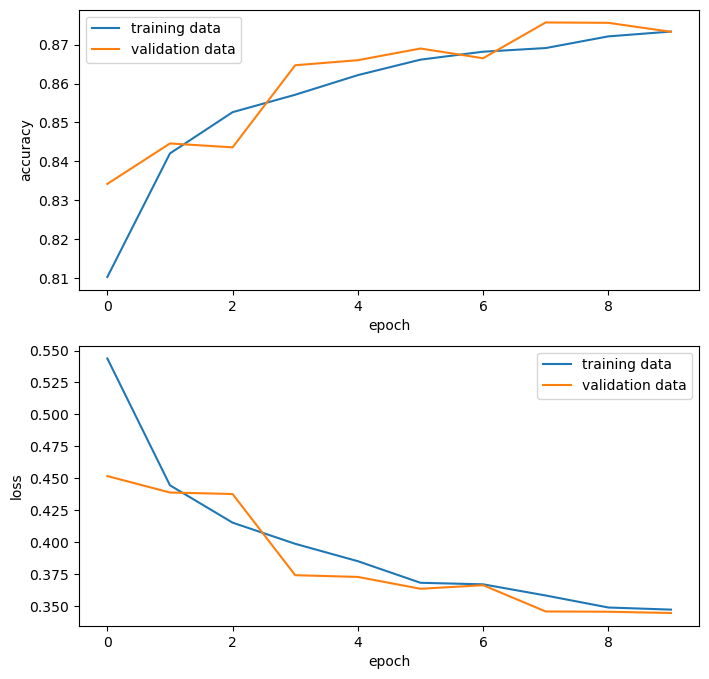

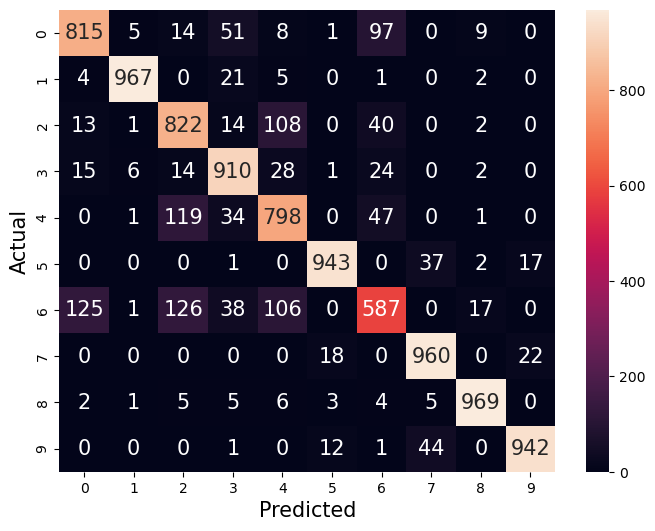

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.82      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.75      0.80      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.73      0.59      0.65      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Experiment 4 with 3 layers: [512, 256, 10]
Using SGD optimizer with default learning rate and 64 batch_size
l2 regularization with 0.001, 0.5 dropout, and with batch normalization
random_normal weight initialization and ones bias initializat

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6155 - loss: 2.4263 - val_accuracy: 0.8103 - val_loss: 1.8177
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7782 - loss: 1.9078 - val_accuracy: 0.8250 - val_loss: 1.7447
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7966 - loss: 1.8190 - val_accuracy: 0.8324 - val_loss: 1.6840
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8085 - loss: 1.7519 - val_accuracy: 0.8334 - val_loss: 1.6305
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8161 - loss: 1.6920 - val_accuracy: 0.8406 - val_loss: 1.5872
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8238 - loss: 1.6447 - val_accuracy: 0.8450 - val_loss: 1.5431
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8237 - loss: 1.6019 - val_accuracy: 0.8463 - val_loss: 1.5054
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8238 - loss: 1.5658 - val_accuracy: 0.

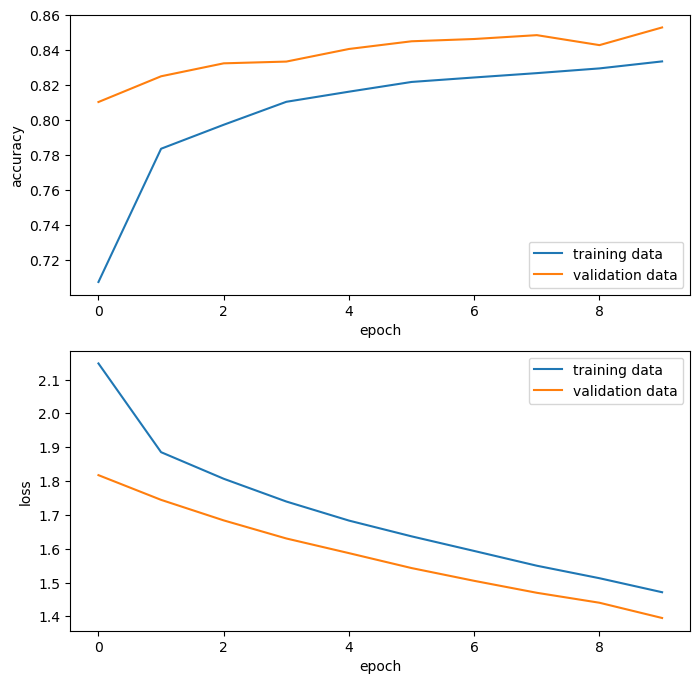

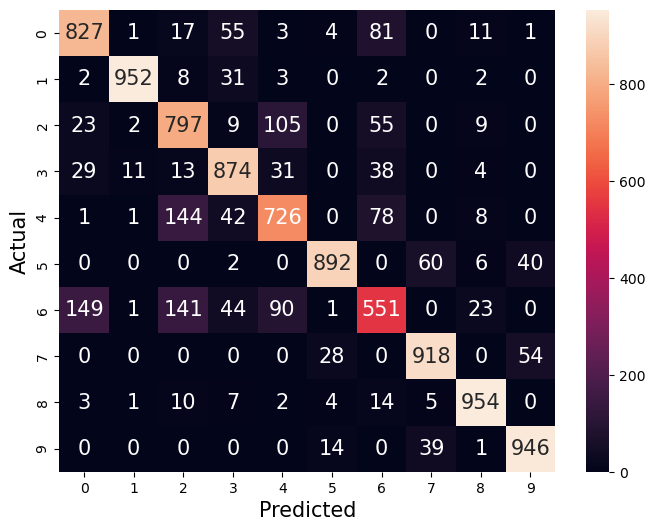

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.71      0.80      0.75      1000
           3       0.82      0.87      0.85      1000
           4       0.76      0.73      0.74      1000
           5       0.95      0.89      0.92      1000
           6       0.67      0.55      0.61      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.95      0.95      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Experiment 5 with 2 layers: [10, 10]
Using SGD optimizer with 0.1 learning rate and 64 batch_size
l2 regularization with 0.001, 0.3 dropout, and with batch normalization
random_normal weight initialization and random_normal bias initializati

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,000 (31.25 KB)

 Trainable params: 7,980 (31.17 KB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.6081 - loss: 1.1730 - val_accuracy: 0.7129 - val_loss: 0.9479
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.7406 - loss: 0.7474 - val_accuracy: 0.8023 - val_loss: 0.5807
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.7606 - loss: 0.7069 - val_accuracy: 0.7021 - val_loss: 0.8261
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7749 - loss: 0.6739 - val_accuracy: 0.7871 - val_loss: 0.6491
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7866 - loss: 0.6457 - val_accuracy: 0.7959 - val_loss: 0.5856
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.7882 - loss: 0.6415 - val_accuracy: 0.8341 - val_loss: 0.5184
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.7937 - loss: 0.6328 - val_accuracy: 0.8240 - val_loss: 0.5328
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.7915 - loss: 0.6354 - 

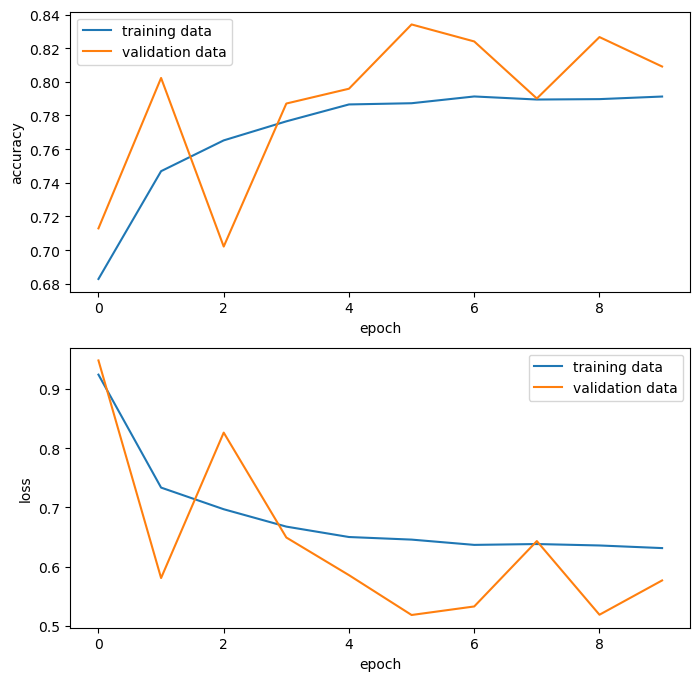

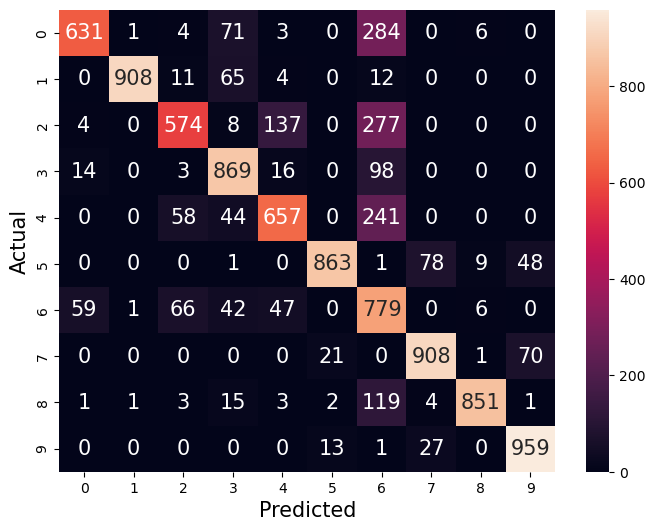

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1000
           1       1.00      0.91      0.95      1000
           2       0.80      0.57      0.67      1000
           3       0.78      0.87      0.82      1000
           4       0.76      0.66      0.70      1000
           5       0.96      0.86      0.91      1000
           6       0.43      0.78      0.55      1000
           7       0.89      0.91      0.90      1000
           8       0.97      0.85      0.91      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.84      0.80      0.81     10000
weighted avg       0.84      0.80      0.81     10000

Experiment 6 with 2 layers: [256, 10]
Using ADAM optimizer with default learning rate and 256 batch_size
l2 regularization with 0.0005, 0.2 dropout, and with batch normalization
he_normal weight initialization and zeros bias initialization


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,554 (799.04 KB)

 Trainable params: 204,042 (797.04 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7454 - loss: 0.9942 - val_accuracy: 0.8343 - val_loss: 0.7187
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.6016 - val_accuracy: 0.8567 - val_loss: 0.5777
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.5300 - val_accuracy: 0.8528 - val_loss: 0.5659
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.4912 - val_accuracy: 0.8578 - val_loss: 0.5259
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.4579 - val_accuracy: 0.8303 - val_loss: 0.5602
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.4440 - val_accuracy: 0.8562 - val_loss: 0.5033
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.4250 - val_accuracy: 0.8504 - val_loss: 0.5207
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.4139 - val_accuracy: 0.

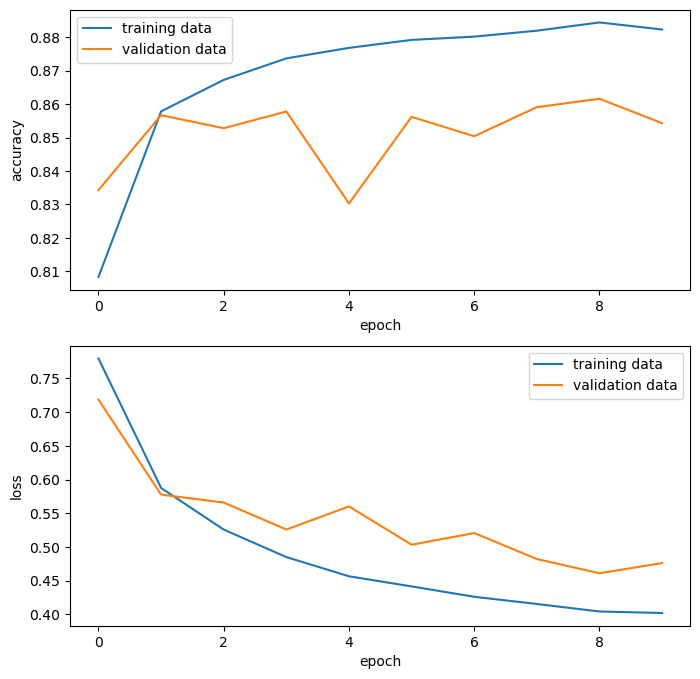

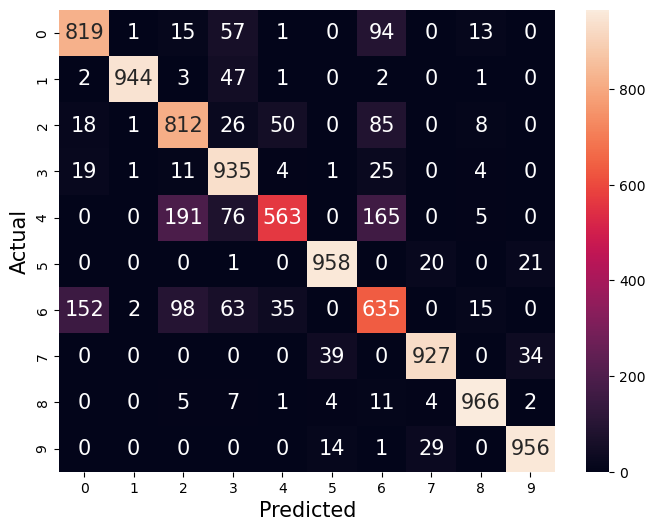

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.99      0.94      0.97      1000
           2       0.72      0.81      0.76      1000
           3       0.77      0.94      0.85      1000
           4       0.86      0.56      0.68      1000
           5       0.94      0.96      0.95      1000
           6       0.62      0.64      0.63      1000
           7       0.95      0.93      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

Experiment 7 with 5 layers: [512, 256, 128, 64, 10]
Using ADAM optimizer with default learning rate and 1024 batch_size
l2 regularization with 0.0005, 0.1 dropout, and with batch normalization
he_normal weight initialization and zeros bias i

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6653 - loss: 1.9860 - val_accuracy: 0.7629 - val_loss: 1.7304
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8495 - loss: 1.2957 - val_accuracy: 0.8441 - val_loss: 1.3493
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8728 - loss: 1.1476 - val_accuracy: 0.8439 - val_loss: 1.2034
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8787 - loss: 1.0408 - val_accuracy: 0.8685 - val_loss: 1.0745
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8856 - loss: 0.9510 - val_accuracy: 0.8663 - val_loss: 0.9927
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8894 - loss: 0.8765 - val_accuracy: 0.8498 - val_loss: 0.9461
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8951 - loss: 0.8075 - val_accuracy: 0.8394 - val_loss: 0.9381
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8987 - loss: 0.7540 - val_accuracy: 0.8415 - v

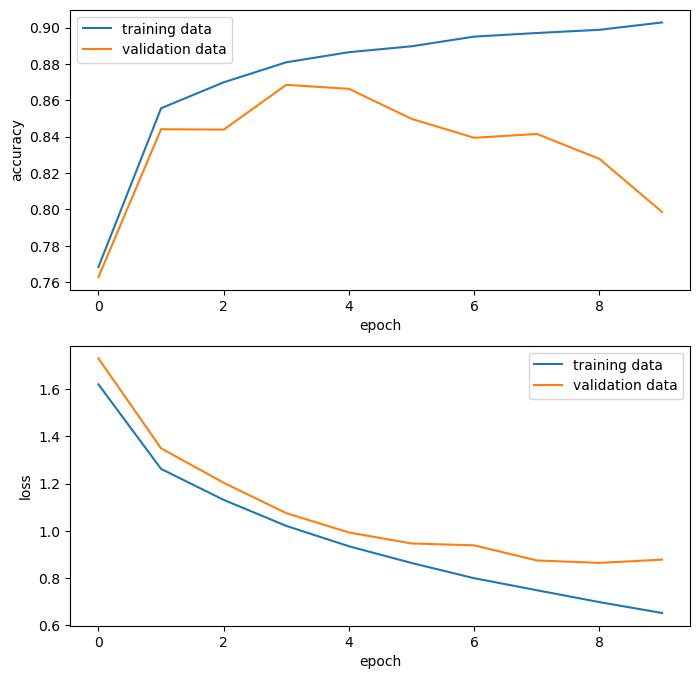

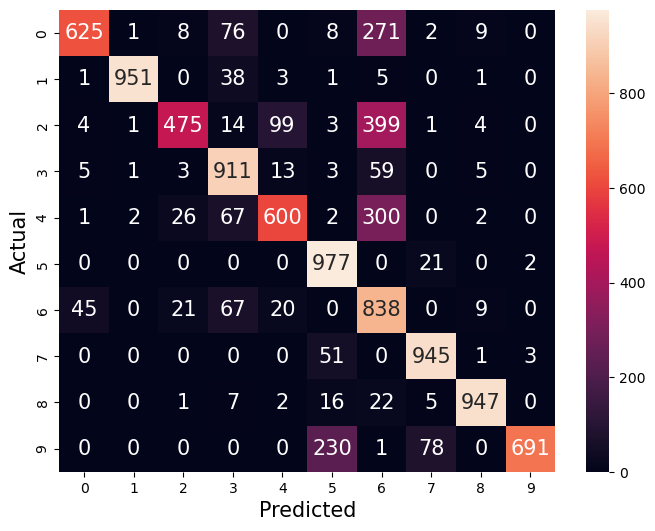

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1000
           1       0.99      0.95      0.97      1000
           2       0.89      0.47      0.62      1000
           3       0.77      0.91      0.84      1000
           4       0.81      0.60      0.69      1000
           5       0.76      0.98      0.85      1000
           6       0.44      0.84      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.99      0.69      0.81      1000

    accuracy                           0.80     10000
   macro avg       0.84      0.80      0.80     10000
weighted avg       0.84      0.80      0.80     10000



In [46]:
for i, hyperparameters in enumerate((
    # We can get how many ever models we need by giving the hyperparameters as required.
    # (num_layers, num_hidden_neurons, optimizer, batch_size, learning_rate, regularization, dropout, batch_normalization, weight_init, bias_init)
    (1, 0, 'adam', None, None, None, None, False, None, None), # ann1
    (2, 128, 'adam', None, None, None, None, False, None, None), # ann2
    (2, 128, 'adam', None, None, None, 0.2, True, None, None), # ann3

    (3, [512, 256], 'sgd', 64, None, ('l2', 1e-3), 0.5, True, 'random_normal', 'ones'), #ann4
    (2, 10, 'sgd', 64, 0.1, ('l2', 1e-3), 0.3, True, 'random_normal', 'random_normal'), #ann5
    (2, 256, 'adam', 256, None, ('l2', 5e-4), 0.2, True, 'he_normal', 'zeros'), #ann6
    (5, [512, 256, 128, 64], 'adam', 1024, None, ('l2', 5e-4), 0.1, True, 'he_normal', 'zeros'), #ann7
)):
    num_hidden_neurons, optimizer, batch_size, regularization, dropout, batch_normalization, weight_init, bias_init = print_experiment(*hyperparameters)
    ann = create_model(num_hidden_neurons, optimizer, regularization, dropout, batch_normalization, weight_init, bias_init)
    info = ann.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_valid, y_valid))
    plot_stats(ann, info)
    


## Conclusion:

### We took 7 models with different kinds of parameters. they are ann1, ann2, ann3, ann4, ann5, ann6, ann7 and we got accuracy for each model as the following:

#### > For ann1, accuracy = 84%
#### > For ann2, accuracy = 88%
#### > For ann3, accuracy = 86%
#### > For ann4, accuracy = 84%
#### > For ann5, accuracy = 76%
#### > For ann6, accuracy = 86%
#### > For ann7, accuracy = 86%

### From these models, we can observe that the model 'ann2' with assigned hyperparameters got more accuracy.